<a href="https://colab.research.google.com/github/Babyaimy/sentimentanalysis-airbnb-london/blob/main/%5BRQ2%5D_DistilBERT_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RQ2: How do sentiment trends vary over time, particularly during significant events such as economic crisis (e.g., Brexit in UK) and COVID-19 pandemic, and are there notable differences in sentiment expressions during those specific phases?**

In [1]:
!pip install transformers[torch] accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# Apply VADER sentiment analysis for initial labeling
nltk.download('vader_lexicon')
nltk.download('stopwords')


# Load the dataset
file_path = 'spelling_corrected_reviews.csv'  # Replace with your actual file path
reviews_df = pd.read_csv(file_path)

# Function to clean text and remove stop words
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lower case
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

# Apply text cleaning
reviews_df['processed_comments'] = reviews_df['comments'].apply(clean_text)


# Custom lexicon dictionary
custom_lexicon = {
    "good": 2.0,
    "bad": -2.0,
    "excellent": 3.0,
    "poor": -3.0,
    "amazing": 3.0,
    "awesome": 3.0,
    "fantastic": 3.0,
    "great": 2.5,
    "wonderful": 3.0,
    "love": 3.0,
    "perfect": 3.0,
    "superb": 3.0,
    "terrific": 3.0,
    "satisfactory": 1.5,
    "delightful": 2.5,
    "happy": 2.0,
    "pleased": 2.0,
    "excellent service": 3.5,
    "highly recommend": 3.5,
    "top-notch": 3.0,
    "terrible": -3.0,
    "awful": -3.0,
    "horrible": -3.0,
    "disgusting": -3.0,
    "hate": -3.0,
    "unacceptable": -2.5,
    "disappointing": -2.0,
    "poor service": -3.5,
    "not recommend": -3.0,
    "waste": -2.5,
    "regret": -2.5,
    "bad experience": -3.0,
    "never again": -3.0,
    "frustrating": -2.0,
    "worst": -3.0,
    "average": 0.0,
    "ok": 0.0,
    "mediocre": -0.5,
    "sufficient": 0.5,
    # Add more words/phrases as needed
}

# Function to update VADER lexicon
def update_vader_lexicon():
    vader_lexicon = SentimentIntensityAnalyzer().lexicon
    vader_lexicon.update(custom_lexicon)
    return SentimentIntensityAnalyzer()

# Initialize the updated VADER sentiment analyzer
sid = update_vader_lexicon()

# Function to classify comments as positive, negative, or neutral using VADER
def classify_sentiment_vader(text):
    score = sid.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis to the reviews DataFrame
reviews_df['sentiment'] = reviews_df['processed_comments'].apply(classify_sentiment_vader)

# Count how many reviews are positive, negative, and neutral
sentiment_counts = reviews_df['sentiment'].value_counts()


# Create summary DataFrame
summary_df = sentiment_counts.reset_index()
summary_df.columns = ['Sentiment', 'Count']

# Print the summary DataFrame
print(summary_df)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  Sentiment  Count
0  positive  31388
1  negative    905
2   neutral    876


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Starting training...


Epoch,Training Loss,Validation Loss
1,0.111700,0.078107
2,0.077300,0.061327
3,0.056600,0.068708


Starting evaluation...


{'eval_loss': 0.06132666394114494, 'eval_runtime': 23.3212, 'eval_samples_per_second': 284.462, 'eval_steps_per_second': 4.459, 'epoch': 3.0}
Predicted sentiment distribution after model prediction:
predicted_sentiment
positive    31440
negative      961
neutral       768
Name: count, dtype: int64
predicted_sentiment  negative   neutral  positive
date                                             
2010-12              0.000000  0.000000  1.000000
2011-03              0.000000  0.000000  1.000000
2011-04              0.000000  0.000000  1.000000
2011-05              0.000000  0.000000  1.000000
2011-06              0.000000  0.000000  1.000000
...                       ...       ...       ...
2023-11              0.027119  0.021186  0.951695
2023-12              0.022222  0.017460  0.960317
2024-01              0.032686  0.028601  0.938713
2024-02              0.024666  0.029805  0.945529
2024-03              0.016000  0.021333  0.962667

[144 rows x 3 columns]


<Figure size 1200x600 with 0 Axes>

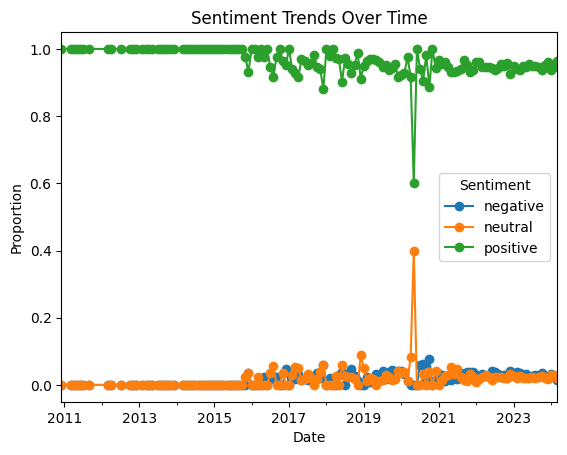

In [5]:
# Encode sentiment labels
label_encoder = LabelEncoder()
reviews_df['label'] = label_encoder.fit_transform(reviews_df['sentiment'])

# Split the data into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(reviews_df['comments'], reviews_df['label'], test_size=0.2, random_state=42)

# Reset indices to ensure they are continuous
train_texts = train_texts.reset_index(drop=True)
val_texts = val_texts.reset_index(drop=True)
train_labels = train_labels.reset_index(drop=True)
val_labels = val_labels.reset_index(drop=True)

# Tokenize the text data
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

class ReviewsDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
        self.encodings = tokenizer(texts.tolist(), truncation=True, padding=True)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Convert labels to Long type
        return item

    def __len__(self):
        return len(self.labels)

# Create train and validation datasets
train_dataset = ReviewsDataset(train_texts, train_labels)
val_dataset = ReviewsDataset(val_texts, val_labels)

# Load pre-trained DistilBERT model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch",     # Evaluate every epoch
    save_strategy="epoch",           # Save every epoch
    load_best_model_at_end=True,     # Load the best model at the end of training
)

# Define Trainer with logging
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)

# Train the model with additional logging
print("Starting training...")
trainer.train()

# Evaluate the model
print("Starting evaluation...")
eval_result = trainer.evaluate()
print(eval_result)

# Save the fine-tuned model
model.save_pretrained('./fine_tuned_distilbert')
tokenizer.save_pretrained('./fine_tuned_distilbert')

# Apply the fine-tuned model for sentiment prediction
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=1).item()
    return label_encoder.inverse_transform([prediction])[0]

reviews_df['predicted_sentiment'] = reviews_df['comments'].apply(predict_sentiment)

# Log predicted sentiment distribution
print("Predicted sentiment distribution after model prediction:")
print(reviews_df['predicted_sentiment'].value_counts())

# Sentiment Trends Analysis
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# Calculate the proportion of each sentiment category by date
sentiment_proportions = reviews_df.groupby(reviews_df['date'].dt.to_period('M'))['predicted_sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Log sentiment proportions
print(sentiment_proportions)

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
sentiment_proportions.plot(kind='line', marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()

# Save the resulting DataFrame to a CSV file
reviews_df.to_csv('reviews_with_predicted_sentiment.csv', index=False)


In [8]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import DataLoader
import torch

# Define the function to get predictions from the model
def get_predictions(model, dataloader):
    model.eval()
    predictions, true_labels = [], []
    for batch in dataloader:
        with torch.no_grad():
            inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
            outputs = model(**inputs)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            labels = batch['labels'].cpu().numpy()
            predictions.extend(preds)
            true_labels.extend(labels)
    return predictions, true_labels

# Ensure the model and inputs are on the same device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Create validation dataloader
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Get predictions on the validation set
val_preds, val_true_labels = get_predictions(model, val_loader)

# Calculate evaluation metrics
val_accuracy = accuracy_score(val_true_labels, val_preds)
val_precision = precision_score(val_true_labels, val_preds, average='weighted')
val_recall = recall_score(val_true_labels, val_preds, average='weighted')
val_f1 = f1_score(val_true_labels, val_preds, average='weighted')
val_classification_report = classification_report(val_true_labels, val_preds, target_names=label_encoder.classes_)

# Display the results
evaluation_metrics = {
    "Accuracy": val_accuracy,
    "Precision": val_precision,
    "Recall": val_recall,
    "F1-Score": val_f1,
    "Classification Report": val_classification_report
}

evaluation_metrics


{'Accuracy': 0.9834187518842328,
 'Precision': 0.982942771526225,
 'Recall': 0.9834187518842328,
 'F1-Score': 0.9830967144170581,
 'Classification Report': '              precision    recall  f1-score   support\n\n    negative       0.75      0.70      0.72       171\n     neutral       0.95      0.86      0.90       173\n    positive       0.99      0.99      0.99      6290\n\n    accuracy                           0.98      6634\n   macro avg       0.89      0.85      0.87      6634\nweighted avg       0.98      0.98      0.98      6634\n'}

In [10]:
# Evaluation metrics dictionary
evaluation_metrics = {
    'Accuracy': 0.9834187518842328,
    'Precision': 0.982942771526225,
    'Recall': 0.9834187518842328,
    'F1-Score': 0.9830967144170581,
    'Classification Report': '              precision    recall  f1-score   support\n\n    negative       0.75      0.70      0.72       171\n     neutral       0.95      0.86      0.90       173\n    positive       0.99      0.99      0.99      6290\n\n    accuracy                           0.98      6634\n   macro avg       0.89      0.85      0.87      6634\nweighted avg       0.98      0.98      0.98      6634\n'
}

# Function to print evaluation metrics in a readable format
def print_evaluation_metrics(metrics):
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    print("\nClassification Report:\n")
    print(metrics['Classification Report'])

# Call the function with the evaluation metrics
print_evaluation_metrics(evaluation_metrics)

Accuracy: 0.9834
Precision: 0.9829
Recall: 0.9834
F1-Score: 0.9831

Classification Report:

              precision    recall  f1-score   support

    negative       0.75      0.70      0.72       171
     neutral       0.95      0.86      0.90       173
    positive       0.99      0.99      0.99      6290

    accuracy                           0.98      6634
   macro avg       0.89      0.85      0.87      6634
weighted avg       0.98      0.98      0.98      6634



**Evaluation Metrics for Fine-Tuned DistilBERT Model**


**Overall Metrics:**

Accuracy: 0.9834
Interpretation: The model correctly predicts 98.34% of the instances.

Precision: 0.9829
Interpretation: When the model predicts a sentiment, 98.29% of those predictions are correct.

Recall: 0.9834
Interpretation: The model correctly identifies 98.34% of the true sentiment instances.

F1-Score: 0.9831
Interpretation: The harmonic mean of precision and recall, indicating a good balance between the two.

**Class-wise Performance:**

Negative Sentiment:

Precision: 0.75
Interpretation: 75% of the reviews predicted as negative are actually negative.

Recall: 0.70
Interpretation: The model correctly identifies 70% of the actual negative reviews.

F1-Score: 0.72
Interpretation: This is a balance between precision and recall for negative sentiment.

Support: 171
Interpretation: The number of true instances for the negative sentiment.

Neutral Sentiment:

Precision: 0.95
Interpretation: 95% of the reviews predicted as neutral are actually neutral.

Recall: 0.86
Interpretation: The model correctly identifies 86% of the actual neutral reviews.

F1-Score: 0.90
Interpretation: This is a balance between precision and recall for neutral sentiment.

Support: 173
Interpretation: The number of true instances for the neutral sentiment.

**Positive Sentiment:**

Precision: 0.99
Interpretation: 99% of the reviews predicted as positive are actually positive.

Recall: 0.99
Interpretation: The model correctly identifies 99% of the actual positive reviews.

F1-Score: 0.99
Interpretation: This is a balance between precision and recall for positive sentiment.

Support: 6290
Interpretation: The number of true instances for the positive sentiment.

**Averages:**

Macro Average (unweighted average of all classes):

Precision: 0.89
Recall: 0.85
F1-Score: 0.87
Interpretation: Treats all classes equally without considering class imbalance.

Weighted Average (takes class imbalance into account):

Precision: 0.98
Recall: 0.98
F1-Score: 0.98
Interpretation: Accounts for the number of true instances per class, giving more importance to the positive class due to its higher frequency.

**Interpretation:**

- High Performance on Positive Sentiment:
The model performs exceptionally well on positive sentiment, which is expected given the class imbalance (6290 positive vs. 171 negative and 173 neutral).
- Lower Performance on Negative Sentiment:
The model's performance on negative sentiment is comparatively lower, with a precision of 0.75 and recall of 0.70. This could be due to the smaller number of negative instances, making it harder for the model to learn to identify them correctly.
- Balanced Performance:
Despite the class imbalance, the model maintains high overall precision, recall, and F1-score, indicating good generalization.


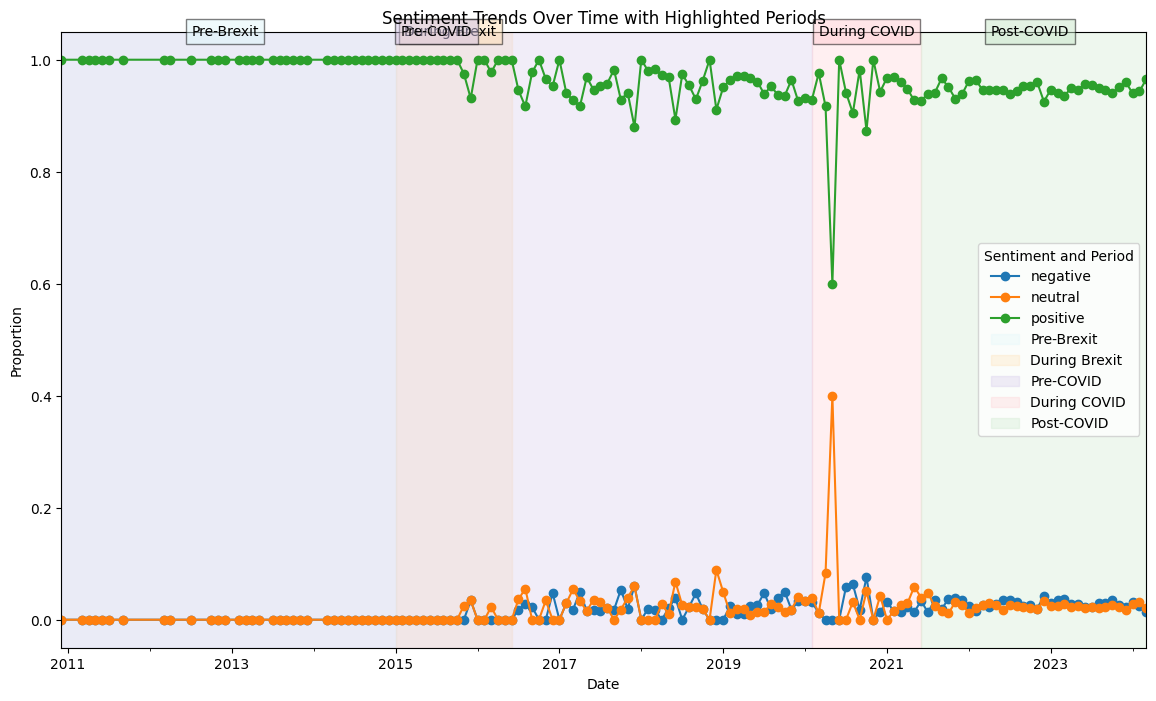

In [ ]:
# Define periods of interest
periods = {
    "Pre-Brexit": (reviews_df['date'].min(), '2015-01'),
    "During Brexit": ('2015-01', '2016-06'),
    "Pre-COVID": (reviews_df['date'].min(), '2020-02'),
    "During COVID": ('2020-02', '2021-06'),
    "Post-COVID": ('2021-06', reviews_df['date'].max())
}

# Plot sentiment trends over time with highlighted periods
plt.figure(figsize=(14, 8))
sentiment_proportions.plot(kind='line', marker='o', ax=plt.gca())

# Highlight specific periods with distinct colors and add annotations
colors = ['#e0f7fa', '#ffe0b2', '#d1c4e9', '#ffcdd2', '#c8e6c9']
for i, (period, (start, end)) in enumerate(periods.items()):
    plt.axvspan(start, end, color=colors[i], alpha=0.3, label=period)
    plt.text(pd.to_datetime(start) + (pd.to_datetime(end) - pd.to_datetime(start)) / 2, 1.05, period,
             horizontalalignment='center', verticalalignment='center', fontsize=10, bbox=dict(facecolor=colors[i], alpha=0.5))

plt.title('Sentiment Trends Over Time with Highlighted Periods')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.legend(title='Sentiment and Period')
plt.show()

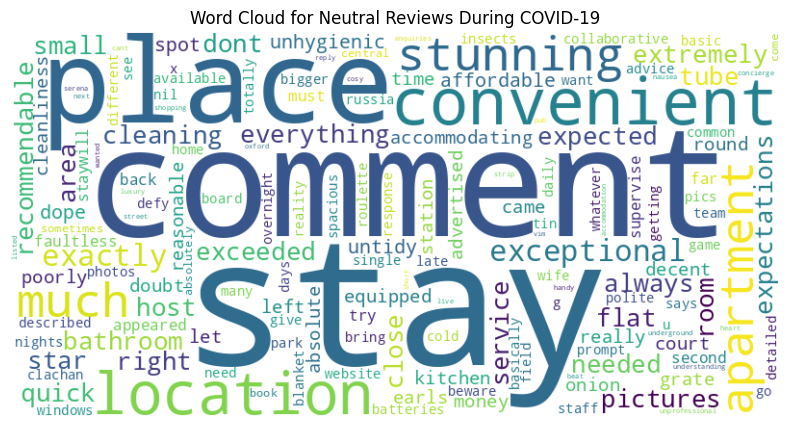

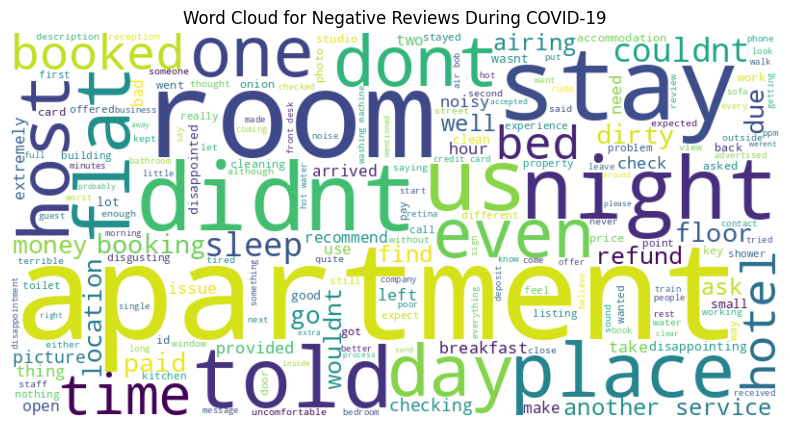

Most Common Words in Neutral Reviews During COVID-19:
[('stay', 11), ('comment', 8), ('place', 7), ('convenient', 6), ('location', 5), ('would', 4), ('stunning', 3), ('much', 3), ('exceptional', 3), ('get', 3), ('exactly', 3), ('area', 2), ('bathroom', 2), ('extremely', 2), ('close', 2), ('small', 2), ('apartment', 2), ('room', 2), ('pictures', 2), ('expected', 2)]

Most Common Words in Negative Reviews During COVID-19:
[('apartment', 62), ('room', 48), ('stay', 32), ('didnt', 30), ('us', 25), ('told', 24), ('would', 23), ('place', 22), ('flat', 22), ('could', 21), ('one', 20), ('dont', 20), ('even', 19), ('night', 19), ('also', 18), ('booked', 18), ('host', 18), ('hotel', 17), ('couldnt', 15), ('dirty', 14)]


In [ ]:
# Load the dataset
file_path = 'reviews_with_predicted_sentiment.csv'  # Replace with your actual file path
reviews_df_new = pd.read_csv(file_path)

# Ensure the 'date' column is in datetime format
reviews_df_new['date'] = pd.to_datetime(reviews_df_new['date'])

# Define the periods of interest
period_during_covid = (reviews_df_new['date'] >= '2020-03-01') & (reviews_df_new['date'] <= '2021-12-31')

# Extract reviews from these periods
neutral_reviews_during_covid = reviews_df_new.loc[period_during_covid & (reviews_df_new['predicted_sentiment'] == 'neutral')]
negative_reviews_during_covid = reviews_df_new.loc[period_during_covid & (reviews_df_new['predicted_sentiment'] == 'negative')]

# Convert 'processed_comments' to strings and drop NaN values
neutral_reviews_during_covid = neutral_reviews_during_covid.dropna(subset=['processed_comments'])
negative_reviews_during_covid = negative_reviews_during_covid.dropna(subset=['processed_comments'])
neutral_reviews_during_covid['processed_comments'] = neutral_reviews_during_covid['processed_comments'].astype(str)
negative_reviews_during_covid['processed_comments'] = negative_reviews_during_covid['processed_comments'].astype(str)

# Function to generate a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to get the most common words
def get_most_common_words(text, num_words=20):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(' '.join(text))
    words = [word for word in words if word.isalpha() and word not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

# Generate word clouds for neutral and negative reviews
generate_word_cloud(neutral_reviews_during_covid['processed_comments'], 'Word Cloud for Neutral Reviews During COVID-19')
generate_word_cloud(negative_reviews_during_covid['processed_comments'], 'Word Cloud for Negative Reviews During COVID-19')

# Get the most common words
common_words_neutral = get_most_common_words(neutral_reviews_during_covid['processed_comments'])
common_words_negative = get_most_common_words(negative_reviews_during_covid['processed_comments'])

print("Most Common Words in Neutral Reviews During COVID-19:")
print(common_words_neutral)

print("\nMost Common Words in Negative Reviews During COVID-19:")
print(common_words_negative)


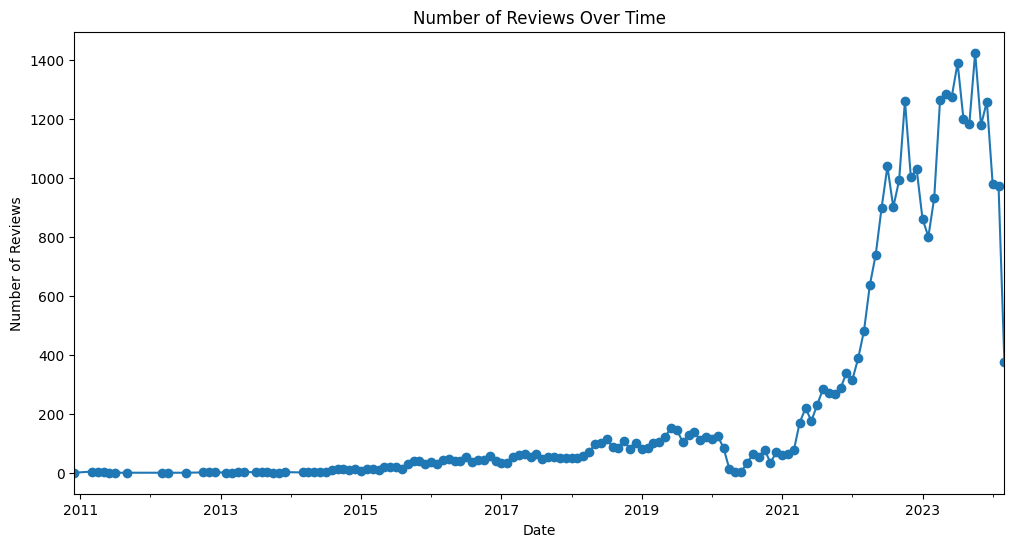

In [ ]:
reviews_df_new['date'] = pd.to_datetime(reviews_df_new['date'])

# Group by month and count the number of reviews
reviews_per_month = reviews_df_new.groupby(reviews_df_new['date'].dt.to_period('M')).size()

# Plot the number of reviews over time
plt.figure(figsize=(12, 6))
reviews_per_month.plot(kind='line', marker='o')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

<Figure size 1200x600 with 0 Axes>

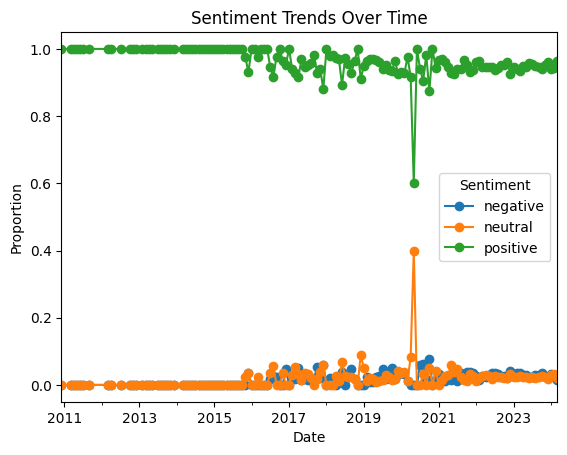

In [ ]:
# Calculate the proportion of each sentiment category by month
sentiment_proportions = reviews_df_new.groupby(reviews_df_new['date'].dt.to_period('M'))['predicted_sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
sentiment_proportions.plot(kind='line', marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
# Define the periods of interest (during the spike)
spike_period = (reviews_df_new['date'] >= '2020-03-01') & (reviews_df_new['date'] <= '2021-12-31')

# Extract reviews from these periods
spike_reviews = reviews_df_new.loc[spike_period]

# Convert 'processed_comments' to strings and drop NaN values
spike_reviews = spike_reviews.dropna(subset=['processed_comments'])
spike_reviews['processed_comments'] = spike_reviews['processed_comments'].astype(str)

# Keywords of interest
keywords = ["cleanliness", "safety", "refund", "cancellation", "lockdown", "pandemic", "service", "host", "support", "communication", "room", "location", "amenities", "internet"]

# Function to filter reviews containing keywords
def filter_reviews_by_keywords(df, keywords):
    keyword_reviews = df[df['processed_comments'].str.contains('|'.join(keywords), case=False)]
    return keyword_reviews

# Filter reviews containing the keywords
keyword_reviews_spike = filter_reviews_by_keywords(spike_reviews, keywords)

# Function to get the most common words
def get_most_common_words(text, num_words=20):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(' '.join(text))
    words = [word for word in words if word.isalpha() and word not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

# Get the most common words in the spike period reviews
common_words_spike = get_most_common_words(keyword_reviews_spike['processed_comments'])

print("Most Common Words in Reviews During Spike Period:")
print(common_words_spike)

Most Common Words in Reviews During Spike Period:
[('great', 1256), ('location', 1234), ('stay', 884), ('apartment', 741), ('clean', 631), ('place', 516), ('would', 465), ('host', 461), ('good', 427), ('room', 369), ('flat', 369), ('nice', 348), ('onion', 313), ('recommend', 311), ('everything', 296), ('well', 284), ('perfect', 270), ('really', 266), ('definitely', 260), ('lovely', 250)]


In [ ]:
# Define the periods of interest (during the spike)
spike_period = (reviews_df_new['date'] >= '2020-03-01') & (reviews_df_new['date'] <= '2021-12-31')

# Extract reviews from these periods
spike_reviews = reviews_df_new.loc[spike_period]

# Convert 'processed_comments' to strings and drop NaN values
spike_reviews = spike_reviews.dropna(subset=['processed_comments'])
spike_reviews['processed_comments'] = spike_reviews['processed_comments'].astype(str)

# Keywords of interest
keywords = ["cleanliness", "safety", "refund", "cancellation", "lockdown", "pandemic", "service", "host", "support", "communication", "room", "location", "amenities", "internet"]

# Function to filter reviews containing keywords
def filter_reviews_by_keywords(df, keywords):
    keyword_reviews = df[df['processed_comments'].str.contains('|'.join(keywords), case=False)]
    return keyword_reviews

# Filter reviews containing the keywords
keyword_reviews_spike = filter_reviews_by_keywords(spike_reviews, keywords)

# Function to get the most common words
def get_most_common_words(text, num_words=20):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(' '.join(text))
    words = [word for word in words if word.isalpha() and word not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

# Get the most common words in the spike period reviews
common_words_spike = get_most_common_words(keyword_reviews_spike['processed_comments'])

print("Most Common Words in Reviews During Spike Period:")
print(common_words_spike)

Most Common Words in Reviews During Spike Period:
[('great', 1256), ('location', 1234), ('stay', 884), ('apartment', 741), ('clean', 631), ('place', 516), ('would', 465), ('host', 461), ('good', 427), ('room', 369), ('flat', 369), ('nice', 348), ('onion', 313), ('recommend', 311), ('everything', 296), ('well', 284), ('perfect', 270), ('really', 266), ('definitely', 260), ('lovely', 250)]


In [ ]:
# Load the dataset with the existing sentiment analysis results
file_path = 'reviews_with_predicted_sentiment.csv'
reviews_df_2020 = pd.read_csv(file_path)

# Convert the date column to datetime
reviews_df_2020['date'] = pd.to_datetime(reviews_df_2020['date'], errors='coerce')

# Filter for reviews during the COVID period
covid_period = (reviews_df_2020['date'] >= '2020-02') & (reviews_df_2020['date'] <= '2021-06')
during_covid_period = reviews_df_2020[covid_period]

during_covid_period

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,sentiment_scores,sentiment_score,sentiment,label,predicted_sentiment
84,49970,622456104,2020-04-15,40039615,guest_085,wonderful host,en,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'comp...",0.5719,positive,2,positive
85,49970,623423483,2020-04-30,63472624,guest_086,bores and his wife were incredible they were v...,en,"{'neg': 0.019, 'neu': 0.836, 'pos': 0.145, 'co...",0.9311,positive,2,positive
86,49970,753276246,2021-04-30,50008234,guest_087,the best hosts give ever had on airing very ge...,en,"{'neg': 0.0, 'neu': 0.502, 'pos': 0.498, 'comp...",0.9168,positive,2,positive
87,49970,764763906,2021-05-31,74783429,guest_088,dosing was lovely upon my arrival the rest of ...,en,"{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compou...",0.9508,positive,2,positive
273,282198,623070172,2020-04-25,88682443,guest_274,i was staying at lucks place for about weeks ...,en,"{'neg': 0.031, 'neu': 0.701, 'pos': 0.268, 'co...",0.9511,positive,2,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
13440,48697891,756984672,2021-05-10,58098121,guest_13441,in general terms it is a place that i would re...,en,"{'neg': 0.087, 'neu': 0.799, 'pos': 0.114, 'co...",0.8572,positive,2,positive
13692,49475006,764099992,2021-05-30,402851195,guest_13693,lovely stay thank you,en,"{'neg': 0.0, 'neu': 0.241, 'pos': 0.759, 'comp...",0.7430,positive,2,positive
13725,49526996,755990504,2021-05-08,369208360,guest_13726,great place,ro,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,positive,2,positive
13726,49526996,761348636,2021-05-23,380156940,guest_13727,really very clean and modern style apartment i...,en,"{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'comp...",0.9328,positive,2,positive


**Interpretation:**

Training Loss:

Epoch 1: The training loss starts at 0.088400, indicating the initial error between the model’s predictions and the actual sentiment labels.
Epoch 2: The training loss slightly decreases to 0.086700, suggesting that the model is learning from the data and improving its predictions.
Epoch 3: The training loss drops significantly to 0.033400, indicating substantial improvement and better fitting to the training data.
Validation Loss:

Epoch 1: The validation loss is 0.084051, close to the training loss, suggesting that the model is not overfitting and is performing similarly on the validation set.
Epoch 2: The validation loss decreases significantly to 0.059141, indicating that the model’s performance on the validation set has improved considerably.
Epoch 3: The validation loss increases slightly to 0.068423, which might indicate a slight overfitting to the training data, but it is still lower than the initial epoch's validation loss.

Summary:
Improvement Over Epochs: The model shows a consistent decrease in training loss over the epochs, demonstrating that it is learning effectively from the training data.
Validation Performance: The validation loss decreases significantly in the second epoch, indicating an improvement in generalization. The slight increase in the third epoch's validation loss suggests a potential overfitting, but it’s not substantial.
Overall: The results indicate a successful training process with the model improving its predictions on both the training and validation sets. The slight increase in validation loss in the third epoch might require some fine-tuning, such as adjusting the number of epochs or using regularization techniques to prevent overfitting.


**Evaluation Metrics:**
eval_loss: 0.0591413751244545

This is the loss computed on the evaluation (validation) dataset. A lower evaluation loss indicates that the model is performing well on the validation set. The value 0.059141 suggests the model’s predictions are quite close to the actual labels.
eval_runtime: 23.2976 seconds

The total time taken to run the evaluation process. It took about 23.3 seconds to evaluate the model on the validation dataset.
eval_samples_per_second: 284.75

The number of samples processed per second during evaluation. Here, approximately 285 samples were evaluated per second, indicating the speed of the evaluation process.
eval_steps_per_second: 4.464

The number of evaluation steps processed per second. This metric helps in understanding the computational efficiency of the evaluation process.
epoch: 3.0

Indicates that the results are from the third epoch of training. This matches with the third epoch training and validation loss values shown earlier.
Predicted Sentiment Distribution:
Positive: 31,461

The model predicted 31,461 reviews as having a positive sentiment. This is a very high number, suggesting that the majority of reviews in your dataset are positive according to the model.
Negative: 907

The model predicted 907 reviews as having a negative sentiment. This relatively small number indicates that few reviews were classified as negative, suggesting either the dataset is predominantly positive or the model is skewed towards predicting positive sentiments.
Neutral: 801

The model predicted 801 reviews as neutral. This is also a small number compared to the positive sentiment predictions, suggesting that neutral sentiments are not as common in the dataset or the model is less sensitive to neutral sentiments.

**Interpretation:**
Model Performance: The low evaluation loss indicates good performance on the validation set, meaning the model has learned to generalize well from the training data.
Sentiment Distribution: The skewed distribution (with a majority of reviews being classified as positive) suggests that the dataset itself may have more positive reviews, or the model is more inclined to predict positive sentiments.


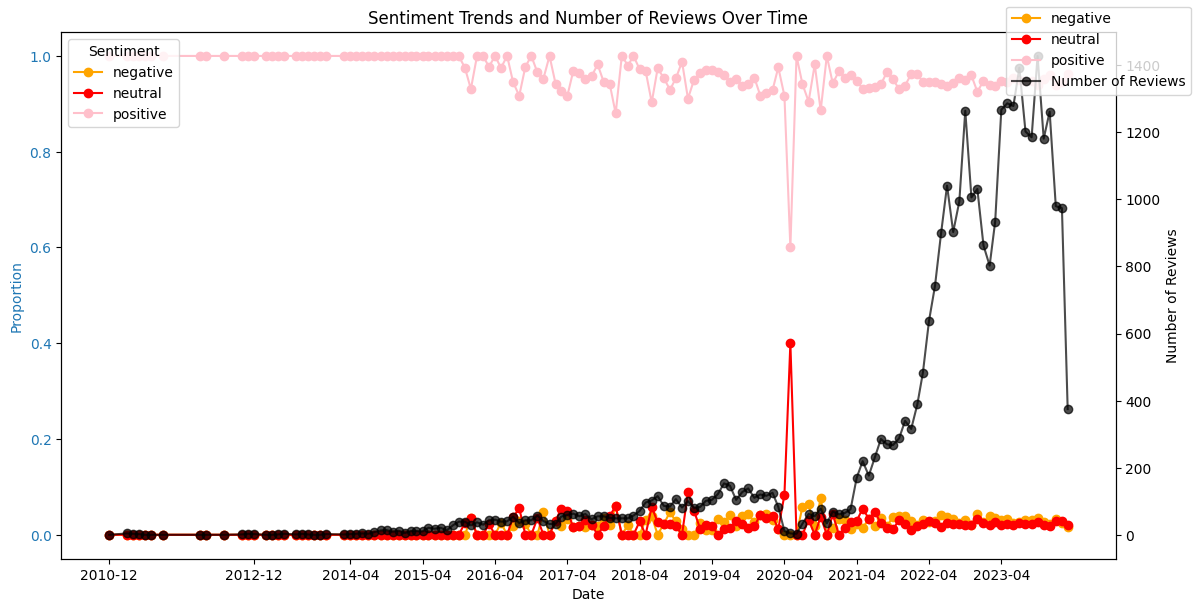

In [13]:
# Load the dataset
file_path = 'reviews_with_predicted_sentiment.csv'  # Replace with your actual file path
reviews_df_new = pd.read_csv(file_path)

# Ensure the 'date' column is in datetime format
reviews_df_new['date'] = pd.to_datetime(reviews_df_new['date'])

# Group by month and count the number of reviews
reviews_per_month = reviews_df_new.groupby(reviews_df_new['date'].dt.to_period('M')).size()

# Calculate the proportion of each sentiment category by month
sentiment_proportions = reviews_df_new.groupby(reviews_df_new['date'].dt.to_period('M'))['predicted_sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Define the colors for each sentiment
colors = {
    'negative': 'orange',
    'neutral': 'red',
    'positive': 'pink'
}

# Convert PeriodIndex to DatetimeIndex for plotting
sentiment_proportions.index = sentiment_proportions.index.to_timestamp()
reviews_per_month.index = reviews_per_month.index.to_timestamp()

# Plot sentiment trends over time along with review counts
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot sentiment proportions
ax1.set_xlabel('Date')
ax1.set_ylabel('Proportion', color='tab:blue')
for sentiment in sentiment_proportions.columns:
    ax1.plot(sentiment_proportions.index, sentiment_proportions[sentiment], marker='o', label=sentiment, color=colors[sentiment])
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(title='Sentiment', loc='upper left')

# Improve date label readability
ax1.set_xticks(sentiment_proportions.index[::12])  # Set ticks every 12 months
ax1.set_xticklabels(sentiment_proportions.index[::12].strftime('%Y-%m'))  # Format labels

# Create a secondary y-axis to plot the number of reviews
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Reviews', color='black')
ax2.plot(reviews_per_month.index, reviews_per_month, marker='o', color='black', alpha=0.7, label='Number of Reviews')
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout()
plt.title('Sentiment Trends and Number of Reviews Over Time')
fig.legend(loc='upper right')
plt.show()

**Potential Reasons for the Trends During COVID:**

Drop in the Number of Reviews: The total number of reviews might have dropped during the COVID period. This can lead to fluctuations in the proportions of sentiments. With fewer reviews, the proportion of neutral and negative reviews can become more significant. Travel Restrictions and Customer Experience: During the COVID period, travel restrictions, safety concerns, and other pandemic-related issues might have led to less enthusiastic reviews. Customers might have focused more on the factual and neutral aspects of their stays rather than expressing positive sentiments. Changes in Expectations and Experiences: The expectations of travelers might have shifted during the pandemic. What was once considered a good experience might have been viewed differently under the stress and uncertainty of COVID.